In [70]:
from src import PINNViga
from src import Carga
from src import Apoio
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd
import time

VIGA BIAPOIADA

In [71]:
## SEÇÃO DA VIGA

b = 0.2
h = 0.4
E = 30e9
I = b * (h ** 3) / 12
EI = E * I

In [72]:
# VIGA BIAPOIADA
# CRIANDO OS APOIOS

L = 2

## CRIANDO OS APOIOS

apoio_esq = Apoio.Apoio([1, 1, 0], [0, 0])
apoio_meio = Apoio.Apoio([1, 1, 0], [L / 2, 0])
apoio_dir = Apoio.Apoio([0, 1, 0], [L, 0])

lista_apoios = [apoio_esq]
# lista_apoios = [apoio_esq, apoio_dir]
lista_apoios = [apoio_esq, apoio_meio, apoio_dir]

## CRIANDO CARGAS


q = -10e3

# q3 = Carga.CargaDistribuida([0, q], [0.45 * L, 0], [0.55 * L, 0])

q2 = Carga.CargaDistribuida([0, q], [0, 0], [L, 0])

cargas = [q2]
# cargas = [q1, q2, q3]

In [73]:
## LOOP DE TREINAMENTO

biapoiada = PINNViga.PINNViga()
biapoiada.run_model(lista_apoios, cargas, EI, num_epochs=850, pde_weight=1, bc_weight=1, tol = 1e-10, tol_apoio=1e-6)

Epoch 0, Loss: 3.225094556808, PDE Loss: 3.193311452866, BC Loss: 0.031783014536
Epoch 85, Loss: 0.078061014414, PDE Loss: 0.017259072512, BC Loss: 0.060801938176
Epoch 170, Loss: 0.024102684110, PDE Loss: 0.008902047761, BC Loss: 0.015200637281
Epoch 255, Loss: 0.010680399835, PDE Loss: 0.000220643939, BC Loss: 0.010459755547
Epoch 340, Loss: 0.010529758409, PDE Loss: 0.000185329729, BC Loss: 0.010344428942
Epoch 425, Loss: 0.010654659010, PDE Loss: 0.000365174550, BC Loss: 0.010289484635
Epoch 510, Loss: 0.010498569347, PDE Loss: 0.000117977506, BC Loss: 0.010380592197
Epoch 595, Loss: 0.010761407204, PDE Loss: 0.000537477958, BC Loss: 0.010223928839
Epoch 680, Loss: 0.010491524823, PDE Loss: 0.000117967415, BC Loss: 0.010373556986
Epoch 765, Loss: 0.010647998191, PDE Loss: 0.000160898533, BC Loss: 0.010487100109
Epoch 850, Loss: 0.010484493338, PDE Loss: 0.000106361251, BC Loss: 0.010378131643
Melhor estado restaurado da época 847 com perda 1.048428e-02


In [79]:
biapoiada.trechos_cargas

[{'x0': 0, 'x1': 1.0, 'qx': 0, 'qy': -10000.0},
 {'x0': 1.0, 'x1': 2, 'qx': 0, 'qy': -10000.0}]

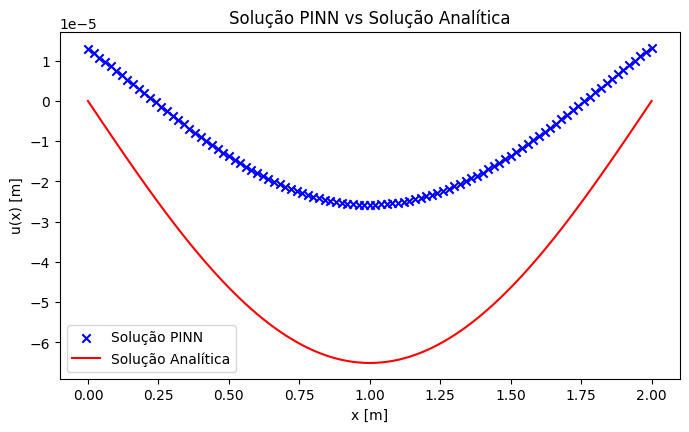

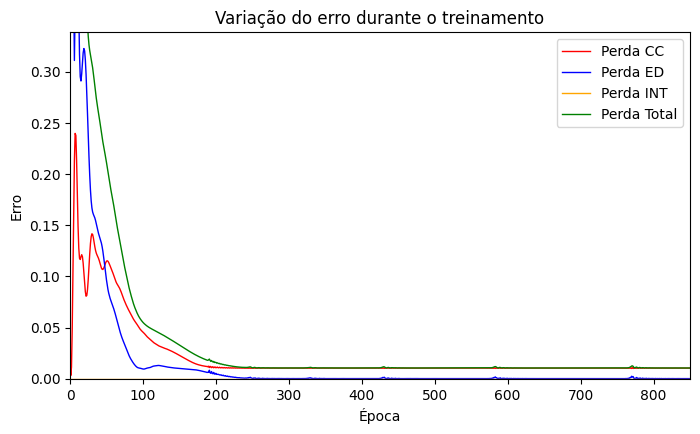

In [74]:
def y_calc(x_val): 
    return (q * x_val / (24 * EI)) * (L**3 - 2 * L * x_val**2 + x_val**3)

# q = -20e3
# def y_calc(x_val):
#     y_val = []
#     for x in x_val:
#         if x <= (L / 2):
#             x_ = x
#         else:
#             x_ = max(x_val) - x
#         #     y =  (fy * x / (48 * EI)) * (4 * (x ** 2) - 3 * L ** 2)
#         # else:
#         #     y =  (fy * x / (48 * EI)) * (- 4 * (x ** 2) + 12 * L * x ** 2 - 9 * (L ** 2) * x + L ** 3)

#         y =  - (p / (48 * EI)) * (4 * (x_ ** 3) - 3 * (L ** 2) * x_)
        
#         y_val.append(y)

#     return y_val

plt.figure(figsize=(8, 4.5))
plt.scatter(biapoiada.x_plot, biapoiada.u_plot, label='Solução PINN', marker='x', color='blue')
plt.plot(biapoiada.x_plot, y_calc(biapoiada.x_plot), label='Solução Analítica', color='red')
plt.title("Solução PINN vs Solução Analítica")
plt.xlabel("x [m]")
plt.ylabel("u(x) [m]")
plt.legend()
plt.grid(False)
plt.savefig('deflexao_biapoiada.png', dpi=300)
plt.show()

biapoiada.plot_errors(10, "erros_biapoiada.png")

In [75]:
biapoiada.u_plot[0]

array([1.2864582e-05], dtype=float32)

In [76]:
float(biapoiada.x_plot[0])

C:\Users\Tácio\AppData\Local\Temp\ipykernel_22616\2014151133.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  float(biapoiada.x_plot[0])


0.0

In [77]:
import torch

biapoiada.model(torch.Tensor([0.0]))

tensor([0.0026], grad_fn=<ViewBackward0>)

In [78]:
# from matplotlib.animation import FuncAnimation, PillowWriter

# fig, ax = plt.subplots(figsize=(8, 4.5))

# ax.set_title("Verificação da convergência")
# ax.set_xlabel("Posição (m)")
# ax.set_ylabel("Deflexão (m)")
# ax.grid(True)
# ax.set_xlim(0, 2)
# ax.set_ylim(min(biapoiada.u_plot) + 0.05 * min(biapoiada.u_plot), max(biapoiada.u_plot) + 0.05 * max(biapoiada.u_plot))
# ax.legend()

# line_pinn, = ax.plot([], [], 'b-', label='Solução PINN')
# # line_analytic, = ax.plot(biapoiada.x_plot, y_calc(biapoiada.x_plot), 'r--', label='Solução Analítica')

# u_plot_variation_reduced = biapoiada.u_plot_variation[::2]

# def animate(i):

#     epoch, u_pinn = u_plot_variation_reduced[i]
#     line_pinn.set_data(biapoiada.x_plot, u_pinn)
#     ax.set_title(f"Verificação da convergência - Época {epoch}")
    
#     return line_pinn,

# anim = FuncAnimation(fig, animate, frames=len(u_plot_variation_reduced), interval=50, blit=True)
# writer = PillowWriter(fps=30)
# anim.save("post_biapoiada.gif", writer=writer)

# plt.show()